Variable Importance Plot - Global Interpretation


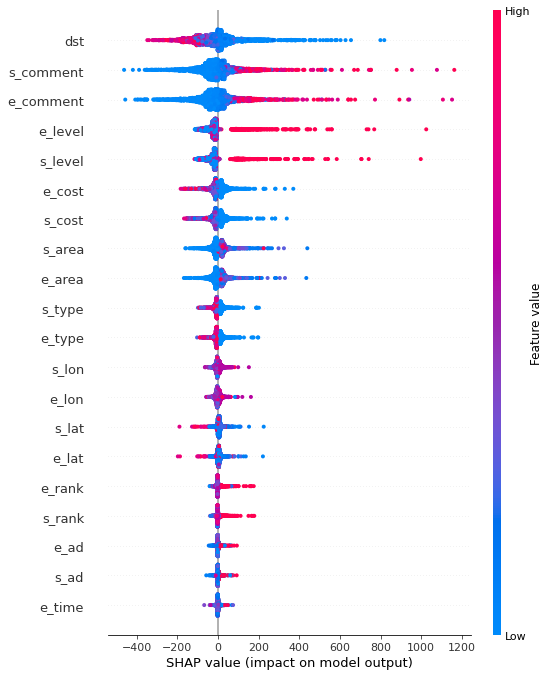

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import shap

def calc_metrics_numpy(predict_flow,real_flow):
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(real_flow,predict_flow)

    error_percent = np.abs(predict_flow - real_flow)/real_flow
    mape = np.average(error_percent)
    return mse,mape






n_estimator =100
max_depth = 20
connection_data_train = pd.read_csv('data/connection_table_train.csv')
x_train = connection_data_train[['s_lon','s_lat','e_lon','e_lat','s_ad','e_ad','s_cost','e_cost','s_type','e_type','s_rank','e_rank','s_comment','e_comment','s_area','e_area','s_level','e_level','s_time','e_time','dst']]
y_train = connection_data_train['weight']
connection_data_valid = pd.read_csv('data/connection_table_valid.csv')
x_valid = connection_data_valid[['s_lon','s_lat','e_lon','e_lat','s_ad','e_ad','s_cost','e_cost','s_type','e_type','s_rank','e_rank','s_comment','e_comment','s_area','e_area','s_level','e_level','s_time','e_time','dst']]
y_valid = connection_data_valid['weight']
connection_data_test = pd.read_csv('data/connection_table_test.csv')
x_test = connection_data_test[['s_lon','s_lat','e_lon','e_lat','s_ad','e_ad','s_cost','e_cost','s_type','e_type','s_rank','e_rank','s_comment','e_comment','s_area','e_area','s_level','e_level','s_time','e_time','dst']]
y_test = connection_data_test['weight']

best_regressor = best_mse = best_max_depth = best_n_estimator = None
for max_depth in [30,40,50]:#[20,30,40]:
    for n_estimator in [150]:#[50,100,150,200]:
        regressor = RandomForestRegressor(n_estimators=n_estimator, random_state=0,max_depth = max_depth)
        regressor.fit(x_train, y_train)
        y_pred_valid = regressor.predict(x_valid)
        mse,mape = calc_metrics_numpy(y_pred_valid,y_valid)
        if best_regressor == None or mse < best_mse:
            best_regressor,best_mse,best_max_depth ,best_n_estimator= regressor,mse,max_depth,n_estimator
# regressor = RandomForestRegressor(n_estimators=n_estimator, random_state=0,max_depth = max_depth)
# regressor.fit(x_train,y_train)
# y_pred_valid = regressor.predict(x_valid)
y_pred_test = best_regressor.predict(x_test)

#     feat_important = regressor.feature_importances_
#     # 特征名
#     feat_name = ['s_lon','s_lat','e_lon','e_lat','s_ad','e_ad','s_cost','e_cost','s_type','e_type','s_rank','e_rank','s_comment','e_comment','s_area','e_area','s_total_trip','e_total_trip','s_level','e_level','s_time','e_time','dst']
#     plt.barh(range(len(feat_name)),feat_important,tick_label=feat_name)


# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(best_regressor)

"""
Compute shap_values for all of X_test rather instead of 
a single row, to have more data for plot.
"""
shap_values = explainer.shap_values(x_test)

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, x_test)







In [16]:
best_max_depth

40

In [17]:
best_n_estimator

150

In [18]:
calc_metrics_numpy(best_regressor.predict(x_valid),y_valid)

(76045.8629224958, 1.723350015389313)

In [19]:
calc_metrics_numpy(best_regressor.predict(x_train),y_train)

(9434.377100323682, 0.6951779304471213)

In [20]:
calc_metrics_numpy(best_regressor.predict(x_test),y_test)

(71196.32192217809, 1.9011510103735763)

Variable Importance Plot - Global Interpretation


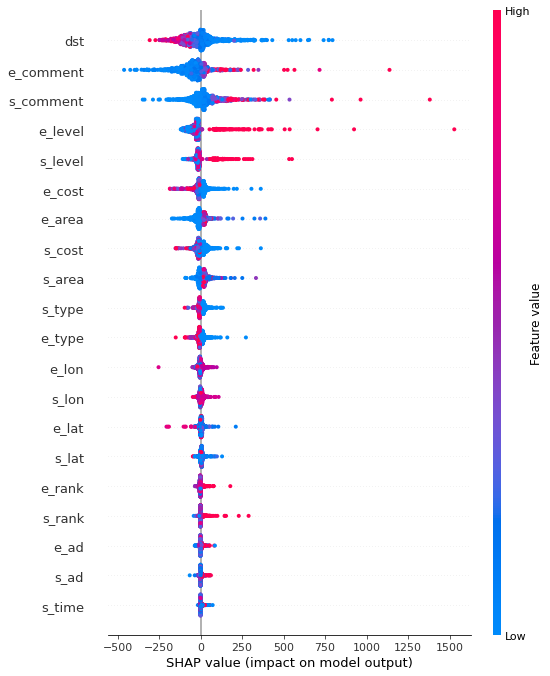

In [21]:
shap_values = explainer.shap_values(x_train[0:1000])

print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, x_train[0:1000])

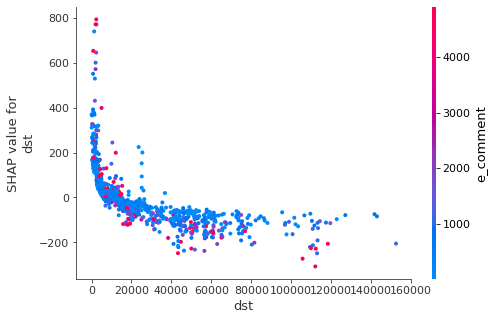

In [22]:
shap.dependence_plot('dst', shap_values, x_train[0:1000])

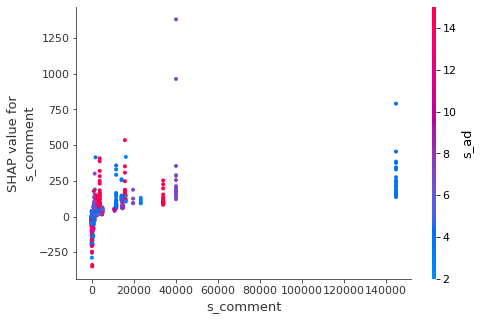

In [23]:
shap.dependence_plot('s_comment', shap_values, x_train[0:1000])

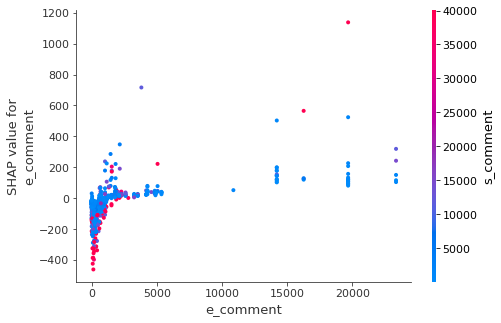

In [24]:
shap.dependence_plot('e_comment', shap_values, x_train[0:1000])

In [25]:
shap_values_test = explainer.shap_values(x_test)